Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd
import sqlite3

In [3]:
# Load bike_stations, foursquare station CSV file 
bike_stations_df = pd.read_csv('data/bike_stations.csv')
foursquare_pois_df = pd.read_csv('data/foursquare_data.CSV')
yelp_pois_df = pd.read_csv('data/yelp_data.csv')

In [4]:
# Merge city_bikes DataFrame with Foursquare POIs
merged_foursquare = pd.merge(bike_stations_df, foursquare_pois_df, 
                             left_on='Station Name', 
                             right_on='bike_station_name', 
                             how='inner')

# Merge the previous merged DataFrame with Yelp POIs
final_merged_df = pd.merge(merged_foursquare, yelp_pois_df,
                            left_on='Station Name',
                            right_on='bike_station_name', 
                            how='inner')

# Check the first few rows of the final merged DataFrame
print(final_merged_df.head())

       Station Name   Latitude   Longitude  Bikes available  \
0  Chilco & Barclay  49.291909 -123.140713                5   
1  Chilco & Barclay  49.291909 -123.140713                5   
2  Chilco & Barclay  49.291909 -123.140713                5   
3  Chilco & Barclay  49.291909 -123.140713                5   
4  Chilco & Barclay  49.291909 -123.140713                5   

  bike_station_name_x            poi_name_x  distance_x  latitude_x  \
0    Chilco & Barclay  Kingyo Izakaya 金魚居酒屋         308   49.290643   
1    Chilco & Barclay  Kingyo Izakaya 金魚居酒屋         308   49.290643   
2    Chilco & Barclay  Kingyo Izakaya 金魚居酒屋         308   49.290643   
3    Chilco & Barclay  Kingyo Izakaya 金魚居酒屋         308   49.290643   
4    Chilco & Barclay  Kingyo Izakaya 金魚居酒屋         308   49.290643   

   longitude_x bike_station_name_y               poi_name_y  distance_y  \
0  -123.136956    Chilco & Barclay                   Kingyo  295.776312   
1  -123.136956    Chilco & Barclay          

In [5]:
# Save the merged DataFrame to a CSV file
final_merged_df.to_csv("data/final_merged_bike_station_data.csv", index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

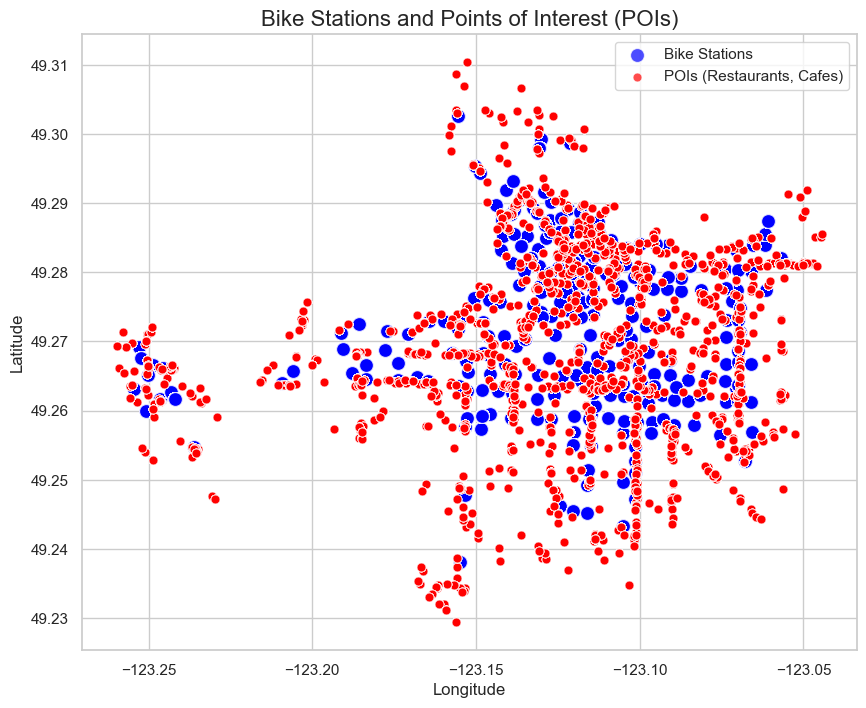

In [15]:
# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a figure and axis for the plot
plt.figure(figsize=(10, 8))

# Plot bike stations (using blue color for bikes)
sns.scatterplot(x=final_merged_df['Longitude'], y=final_merged_df['Latitude'], 
                color='blue', label='Bike Stations', s=100, alpha=0.7)

# Plot POIs (using red color for POIs)
sns.scatterplot(x=final_merged_df['longitude_x'], y=final_merged_df['latitude_x'], 
                color='red', label='POIs (Restaurants, Cafes)', s=40, alpha=0.7)

# Add labels and title
plt.title('Bike Stations and Points of Interest (POIs)', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a legend to distinguish bike stations and POIs
plt.legend(loc='upper right')

# Show grid
plt.grid(True)

# Show the plot
plt.show()


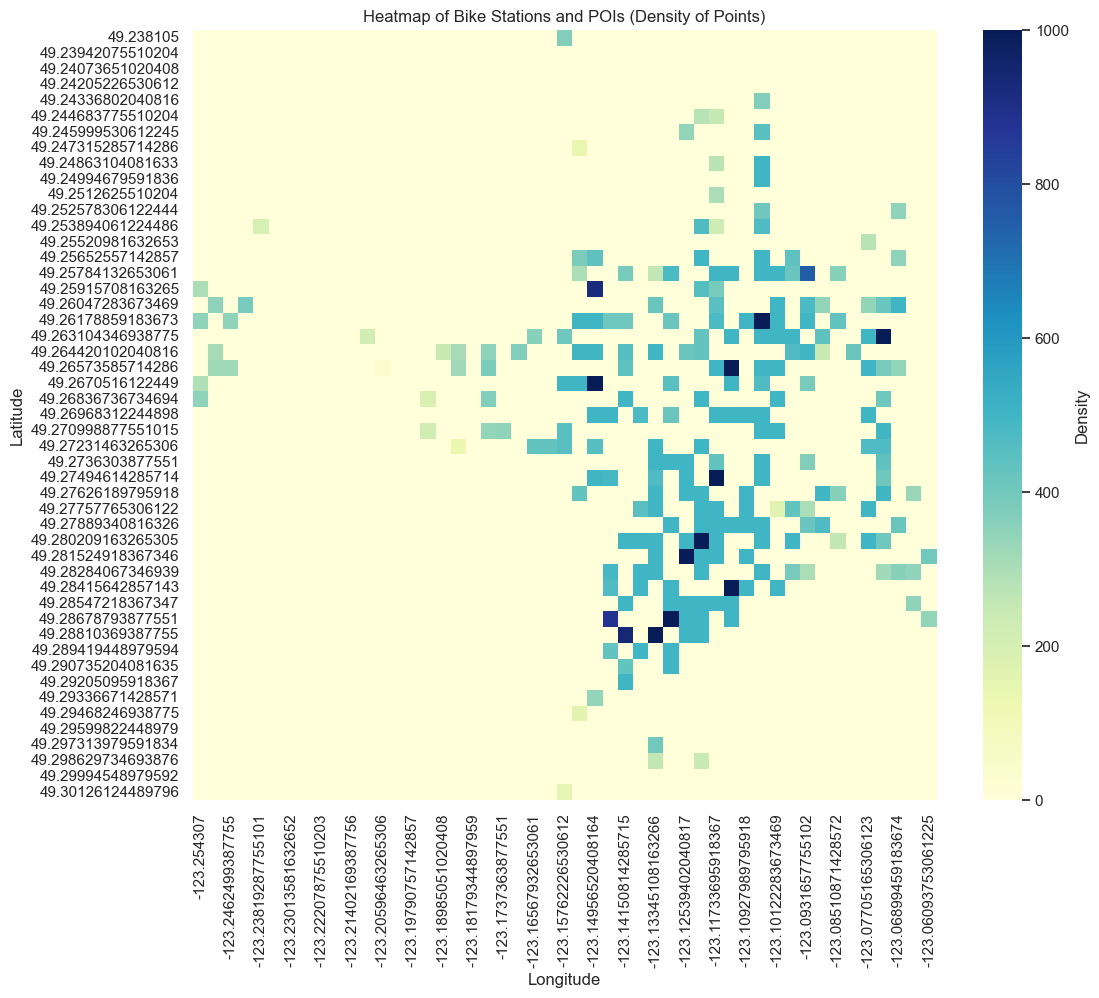

In [17]:
# Binning the latitude and longitude into grid cells
lat_bins = np.linspace(final_merged_df['Latitude'].min(), final_merged_df['Latitude'].max(), num=50)
lon_bins = np.linspace(final_merged_df['Longitude'].min(), final_merged_df['Longitude'].max(), num=50)

# Creating a 2D histogram of the latitude and longitude data
heatmap_data, lat_edges, lon_edges = np.histogram2d(final_merged_df['Latitude'], final_merged_df['Longitude'],
                                                    bins=[lat_bins, lon_bins])

# Create a DataFrame to visualize the 2D histogram
heatmap_df = pd.DataFrame(heatmap_data, index=lat_bins[:-1], columns=lon_bins[:-1])

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_df, cmap='YlGnBu', cbar_kws={'label': 'Density'})
plt.title('Heatmap of Bike Stations and POIs (Density of Points)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

The density of bike stations and POIs (Points of Interest) would focus on identifying geographic patterns and clustering of bike stations or POIs across the region.
Darker areas suggest that there are more bike stations or POIs concentrated in that area. This could indicate areas with better bike infrastructure or popular POIs (e.g., restaurants or cafes).


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [18]:
import sqlite3
from sqlite3 import Error
import os

In [19]:
os.makedirs("data", exist_ok=True)

#function to create connection with database
def create_connection(db_path):
    connection = None
    try:
        connection = sqlite3.connect(db_path)
        print("Connection to database successful")
    except Error as e:
        print(f"The error '{e}' occured")
        
    return connection

connection = create_connection("../data/poi_data.sqlite")


foursquare_pois_df.to_sql('foursquare', connection, if_exists='replace', index=False)
yelp_pois_df.to_sql('yelp', connection, if_exists='replace', index=False)
bike_stations_df.to_sql('Bikes', connection, if_exists='replace', index=False)


connection.close()

Connection to database successful


Look at the data before and after the join to validate your data.

In [20]:
def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occured")

In [21]:
connection = create_connection("../data/poi_data.sqlite")

#using statement to confirm the database connection
query_statement = "SELECT * FROM yelp"
yelp = read_query(connection, query_statement)

for poi in yelp:
    print(poi)

connection.close()

Connection to database successful
('Chilco & Barclay', 'Kingyo', 295.7763124661528, 49.29073911099211, -123.13705023185994)
('Chilco & Barclay', 'Guu with Garlic', 523.400945677947, 49.290249, -123.1338142)
('Chilco & Barclay', 'Robba da Matti West End', 154.68696535700116, 49.29172, -123.13857)
('Chilco & Barclay', 'Zakkushi on Denman', 333.2165194581223, 49.291208, -123.136248)
('Chilco & Barclay', 'Peaked Pies', 296.35265555385354, 49.2896489, -123.1384797)
('Chilco & Barclay', 'Tavola', 363.119817512944, 49.2918164, -123.1357186)
('Chilco & Barclay', 'Maruhachi Ra-men', 551.2316341507952, 49.2905691, -123.1333951)
('Chilco & Barclay', 'Saku', 677.1325247039565, 49.289223, -123.132266)
('Chilco & Barclay', 'Ukrainian Village', 358.87313945413865, 49.2914123, -123.1358196)
('Chilco & Barclay', 'Jingle Bao', 421.6595669884237, 49.291609, -123.134917)
('St George & Broadway', 'The Farmhouse', 298.18144136739915, 49.26185879464837, -123.09710762514682)
('St George & Broadway', 'Pizzeria